---
title: "Лабораторна робота 4. Імовірнісний підхід до машинного навчання. Байєсівська класифікатор"
description:
  __Розпізнавання образів та комп'ютерний зір__
author: "&copy; [<span style='color: blue;'>Valeriy Sydorenko </span>](https://www.linkedin.com/in/valeriy-sydorenko-6782279a/), 2024"
date: "03.21.2024"
lang: ukr
format:
  html:
    code-fold: true
    toc: true # меню
    toc_float: # спливаюче меню  
      collapsed: true # авто
      number_sections: true
jupyter: python3
---

**Мета**: закріпити на практиці концепцію байєсівського вивода засобами мови Python

::: callout-note
## Примітка
Попередньо опрацювати матеріали **Лекції 6**.
:::

## Що ви будете вміти?
* Реалізовувати наївний гаусовський байєсівський класифікатор засобами мови Python
* Реалізувати узагальнену модель байєсівського класифікатора засобами мови Python

## Короткі теоретичні відомості

### Наївний байєсівський класифікатор. Приклад 1

Розглянемо приклад побудови наївного байєсівського класифікаторана на відомій нам задачі класифікації гусениць і божих корівок (табл. 6.1).

**Таблиця 4.1:** *Дані про жуків*

| № | Ширина, $w$ | Довжина, $l$ | Жук |
|------|------|------|------|
| 1    | 10    | 50    |гусениця |
| 2    | 20    | 30   | божа корівка|
| 3    | 25   | 30  | божа корівка|
| 4    | 20   | 60   | гусениця|
| 5    | 15   | 70    | гусениця|
| 6    | 40   | 40   | божа корівка|
| 7    | 30   | 45   | божа корівка|
| 8    | 20   | 45   | гусениця|
| 9    | 40   | 30   | божа корівка|
| 10    | 7    | 35    | гусениця|

Будемо вважати, що довжина і ширина підкоряються нормальному закону розподілу, тоді умовні закони розподілу в залежності від класу запишемо:

$p(l|y) = \frac{1}{\sqrt{2 \pi} \sigma_l} exp \Big\{ -\frac{(l - m_l)^2}{2 \sigma_l} \Big\}$

$p(w|y) = \frac{1}{\sqrt{2 \pi} \sigma_w} exp \Big\{ -\frac{(w - m_w)^2}{2 \sigma_w} \Big\}$

Для оцінки цих щільностей нам потрібно оцінити спочатку їх математичні сопдівання:

$\widehat{m}_l^{(-1)} = \frac{1}{5} (50 + 60 + 70 + 45 + 35) = 52$  
$\widehat{m}_l^{(+1)} = \frac{1}{5} (30 + 30 + 40 + 45 + 30) = 35$  
$\widehat{m}_w^{(-1)} = \frac{1}{5} (10 + 20 + 15 + 20 + 7) = 14,4$  
$\widehat{m}_w^{(+1)} = \frac{1}{5} (20 + 25 + 40 + 30 + 40) = 31$ 

та дисперсії:

$\widehat{\sigma}_l^{(-1)} = \frac{1}{5} ((50-52)^2 + (60-52)^2 + (70-52)^2 + (45-52)^2 + (35-52)^2) = 182,5$  
$\widehat{\sigma}_l^{(+1)} = \frac{1}{5} ((30-35)^2 + (30-35)^2 + (40-35)^2 + (45-35)^2 + (33-35)^2) = 150$  
$\widehat{\sigma}_w^{(-1)} = \frac{1}{5} ((10-14,4)^2 + (20-14,4)^2 + (15-14,4)^2 + (20-14,4)^2 + (7-14,4)^2) = 34,4$  
$\widehat{\sigma}_w^{(+1)} = \frac{1}{5} ((20-31)^2 + (25-31)^2 + (40-31)^2 + (30-31)^2 + (40-31)^2) = 31$

Тепер можна оцінити умовні щільності розподілів. У нашому випадку теоретичний закон запишеться як

$p(\mathbf{x}|y) = p(l, w| y) = p(l|y) p(w|y).$

Тоді оцінки для кожного класу запишуться як

$\widehat{p}(l, w |y= -1)= \frac{1}{2 \widehat{\sigma}_l^{(-1)} \widehat{\sigma}_w^{(-1)}} exp \Big\{ -\frac{(l - \widehat{m}_l^{(-1)})^2}{2 \widehat{\sigma}_l^{(-1)}} -\frac{(w - \widehat{m}_w^{(-1)})^2}{2 \widehat{\sigma}_w^{(-1)}} \Big\}$

$\widehat{p}(l, w |y= +1)= \frac{1}{2 \widehat{\sigma}_l^{(+1)} \widehat{\sigma}_w^{(+1)}} exp \Big\{ -\frac{(l - \widehat{m}_l^{(+1)})^2}{2 \widehat{\sigma}_l^{(+1)}} -\frac{(w - \widehat{m}_w^{(+1)})^2}{2 \widehat{\sigma}_w^{(+1)}} \Big\}$

Нарешті оцінюємо ймовірності появи об'єктів першого і другого класу:

$\widehat{P}(y= -1) = \widehat{P}(y= +1) = \frac{5}{10} = \frac{1}{2}.$

Тепер, після того, як всі складові обчислені, можна знайти оцінку байесівського класифікатора:

$a(x) = arg \; \max \limits_{\substack y \in Y} (ln \lambda_j \widehat{P}(y) + \sum_{i=1}^n ln \widehat{p} (\xi_i |y)).$

Положимо $\lambda_{y=-1} = \lambda_{y=+1} =1.$

Далі

$\begin{cases}
a(l, w |y = -1) = ln \frac{1}{2} +  \Big( -\frac{(l - \widehat{m}_l^{(-1)})^2}{2 \widehat{\sigma}_l^{(-1)}} -\frac{(w - \widehat{m}_w^{(-1)})^2}{2 \widehat{\sigma}_w^{(-1)}} \Big)\\
a(l, w |y = +1) = ln \frac{1}{2} +  \Big( -\frac{(l - \widehat{m}_l^{(+1)})^2}{2 \widehat{\sigma}_l^{(+1)}} -\frac{(w - \widehat{m}_w^{(+1)})^2}{2 \widehat{\sigma}_w^{(+1)}} \Big).
\end{cases}$


Складову $ln \frac{1}{2}$ у обох випадках можна відкинути, так як вона не впливає на задачу оптимуму. Остаточно отримаємо:

$\begin{cases}
a(l, w |y = -1) = \Big( -\frac{(l - \widehat{m}_l^{(-1)})^2}{2 \widehat{\sigma}_l^{(-1)}} -\frac{(w - \widehat{m}_w^{(-1)})^2}{2 \widehat{\sigma}_w^{(-1)}} \Big)\\
a(l, w |y = +1) = \Big( -\frac{(l - \widehat{m}_l^{(+1)})^2}{2 \widehat{\sigma}_l^{(+1)}} -\frac{(w - \widehat{m}_w^{(+1)})^2}{2 \widehat{\sigma}_w^{(+1)}} \Big).
\end{cases}$

Тепер задача зводиться до підстановки в кожний із виразів конкретни значення образів $(l, m)$ і обираємо той клас, для якого значення $a(x)$ виявилося найбільшим.

In [3]:
# Приклад реалізації наївного гаусовського байєсівського класифікатора

import numpy as np
import matplotlib.pyplot as plt


x_train = np.array([[10, 50], [20, 30], [25, 30], [20, 60], [15, 70], [40, 40], [30, 45], [20, 45], [40, 30], [7, 35]])
y_train = np.array([-1, 1, 1, -1, -1, 1, 1, -1, 1, -1])

mw1, ml1 = np.mean(x_train[y_train == 1], axis=0)
mw_1, ml_1 = np.mean(x_train[y_train == -1], axis=0)

# формула для обчислення дисперсії тут трохи інша 1/N*sum(...)
sw1, sl1 = np.var(x_train[y_train == 1], axis=0)
sw_1, sl_1 = np.var(x_train[y_train == -1], axis=0)

print('Середнє: ', mw1, ml1, mw_1, ml_1)
print('Дисперсії:', sw1, sl1, sw_1, sl_1)

x = [40, 10]  # довжина, ширина жука

a_1 = lambda x: -(x[0] - ml_1) ** 2 / (2 * sl_1) - (x[1] - mw_1) ** 2 / (2 * sw_1) # Перший класифікатор
a1 = lambda x: -(x[0] - ml1) ** 2 / (2 * sl1) - (x[1] - mw1) ** 2 / (2 * sw1) # Другий класифікатор
y = np.argmax([a_1(x), a1(x)]) # Обираємо максимум

print('Номер класу (0 - гусениця, 1 - божа корівка): ', y)


Середнє:  31.0 35.0 14.4 52.0
Дисперсії: 64.0 40.0 27.439999999999998 146.0
Номер класу (0 - гусениця, 1 - божа корівка):  0


## Гаусівський байєсівський класифікатор

Розглянемо не наївний? а повноцінний бейєсівський клсифікатор:

$X^l = \Big\{ (x_i, y_i)_{i=1}^l \sim N(m, \sigma) \Big\}$

![*Рис. 6.3*](image 6/ris3.png)

Як і раніше

$P(y|x) =\frac{P(y) p(x|y)}{p(x)}.$

Тут

$p(x|y) = \frac{1}{(2 \pi det \sum_y)^{n/2}} exp \Big[ - \frac{1}{2} (x - \mu_y)^T \sum_y^{-1} (x - \mu_y) \Big],$

де

$\mu = [\mu_y^1, \mu_y^2, ..., \mu_y^n]^T$ -- вектор математичного сподівання, а

$\Sigma_y = E \Bigg\{ \begin{bmatrix}
x^1 - \mu_y \\
x^2 - \mu_y \\
... \\
x^n - \mu_y
\end{bmatrix} [(x^1 - \mu_y), (x^2 - \mu_y), ..., x^n - \mu_y]^T \Bigg\}$ -- матриця коваріації.

При цьому алгоритм прийняття рішень записують абсолютно так само, як і у випадку наївного байєсівського класифікатора:

$a(x) = arg \; \max \limits_{\substack{y \in Y}} \lambda_y P(y) p(x|y).$

Тільки змінюється сам вигляд сумісного закону розподілу.

::: callout-important
## Важливо

Гаусівський байєсівський класифікатор є узагальненням наївного байєсівського класифікатора і виходить із того самого припущення, що і наївний: вектор вхідних ознак має нормальний розподіл, але у **загальному випадку враховує можливі кореляції між ними**. Ця інформація зберігається у матриці коваріацій $\Sigma$.
:::

Тобто, коли має місце діагональна матриця коваріацій

$\Sigma_y = \begin{bmatrix}
\sigma_1^2 & 0 & ... & 0 \\
0 & \sigma_2^2 & ... & 0\\
\vdots & \vdots & \ddots & \vdots\\
0 & 0 & ... & \sigma_n^2\\
\end{bmatrix},$

маємо випадок наївного байєсівського класифікатора.

На практиці для реалізації повноційнного гаусівського байєсівського класифікатора необхідно спочатку знайти оцінки параметрів розподілу

$\widehat{\mu}_y, \widehat{\Sigma}_y, u \in Y.$

за такими формулами:

$\widehat{\mu}_y = \frac{1}{l_y} \sum \limits_{\substack{i: y_i=y}} x_i,$

$\widehat{\Sigma}_y = \frac{1}{l_y} \sum \limits_{\substack{i: y_i=y}} (x_i - \widehat{\mu}_y)(x_i - \widehat{\mu}_y)^T.$

Розглянемо приклад.

### Приклад 2

Згенеруємо два кластери з такими параметрами.

Для першого класу:

$\rho_1 =0,8$, $\sigma_{x_1}^2 = 1,0$, $\mu_{y_1} = [0, -3]^T$, $\Sigma_{y_1} = \begin{pmatrix}
\sigma_{x_1}^2 & \sigma_{x_1}^2 \rho_1 \\
\sigma_{x_1}^2 \rho_1 & \sigma_{x_1}^2
\end{pmatrix}$ 

Для другого класу:

$\rho_2 =0,7$, $\sigma_{x_2}^2 = 2,0$, $\mu_{y_2} = [0, 3]^T$, $\Sigma_{y_2} = \begin{pmatrix}
\sigma_{x_2}^2 & \sigma_{x_2}^2 \rho_2 \\
\sigma_{x_2}^2 \rho_2 & \sigma_{x_2}^2
\end{pmatrix}.$

Далі

$a(x) = arg \; \max \limits_{\substack y \in Y} \Big(ln \lambda_j \widehat{P}(y) - \frac{1}{2} (x - \widehat{\mu}_y)^T \widehat{\sum}_y^{-1} (x - \widehat{\mu}_y) - \frac{1}{2} ln \; det \; \widehat{\Sigma}_y  \Big)$, $N = 1000.$


0


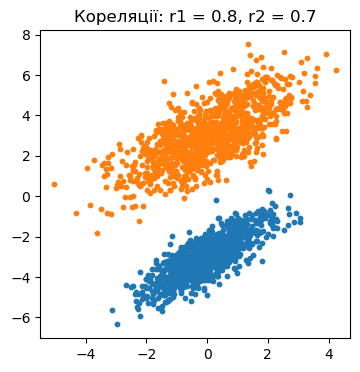

In [4]:
# Гауссівський баєсівський класифікатор

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

# вихідні параметри розподілів двох класів
r1 = 0.8
D1 = 1.0
mean1 = [0, -3]
V1 = [[D1, D1 * r1], [D1 * r1, D1]]

r2 = 0.7
D2 = 2.0
mean2 = [0, 3]
V2 = [[D2, D2 * r2], [D2 * r2, D2]]

# моделювання навчальної вибірки
N = 1000
x1 = np.random.multivariate_normal(mean1, V1, N).T
x2 = np.random.multivariate_normal(mean2, V2, N).T

# обчислення оцінок середнього та коваріаційних матриць
mm1 = np.mean(x1.T, axis=0)
mm2 = np.mean(x2.T, axis=0)

a = (x1.T - mm1).T
VV1 = np.array([[np.dot(a[0], a[0]) / N, np.dot(a[0], a[1]) / N],
                [np.dot(a[1], a[0]) / N, np.dot(a[1], a[1]) / N]])

a = (x2.T - mm2).T
VV2 = np.array([[np.dot(a[0], a[0]) / N, np.dot(a[0], a[1]) / N],
                [np.dot(a[1], a[0]) / N, np.dot(a[1], a[1]) / N]])

# модель гауссівського баєсівського класифікатора
Py1, L1 = 0.5, 1  # ймовірності появи класів
Py2, L2 = 1 - Py1, 1  # та величини штрафів невірної класифікації

b = lambda x, v, m, l, py: np.log(l * py) - 0.5 * (x - m) @ np.linalg.inv(v) @ (x - m).T - 0.5 * np.log(
    np.linalg.det(v))

x = np.array([0, -4])  # вхідний вектор у форматі (x, y)
a = np.argmax([b(x, VV1, mm1, L1, Py1), b(x, VV2, mm2, L2, Py2)])  # класифікатор
print(a)

# виведення графіків
plt.figure(figsize=(4, 4))
plt.title(f"Кореляції: r1 = {r1}, r2 = {r2}")
plt.scatter(x1[0], x1[1], s=10)
plt.scatter(x2[0], x2[1], s=10)
plt.show()

## Завдання для самостійної роботи 

1. Реалізувати наївний байєсівський класифікатор для свого варіанта (І завдання).
1. Реалізувати байєсівський класифікатор, попередньо змоделювавши дані згідно параметри кластерів у відповідності до свого варіанта (ІІ завдання).
 + Змінити знак коефіцієнта кореляції одного з кластерів. Повторити експеримент з класифікації. Що відбулося? вивести результати і прокоментувати
 + Модифікувати код на випадок трьох кластерів. Змоделювати відповідні дані і візуалізувати результати. ПРодемонструвати працездатність класифікатора.   
1. Дати відповіді на контрольні запитання.
1. Відправити результати роботи у файлі lab_4_StudentLastName.ipynb до віддаленого репозиторію на GіtHub.

## Контрольні питання

1. Яка суть проблеми ймовірнісного погляду на машинне навчання в контексті логістичної регресії?
1. Як працює метод максимальної правдоподібності в логістичній регресії?
1. Чим відрізняється багатокласова логістична регресія від бінарної?
1. Що таке L2-регуляризатор і в чому сенс його використання для регуляризації моделей?
1. Що таке L1-регуляризатор і в чому його принципова відмінність від L2-регуляризатора?
1. В яких випадках доцільно використовувати лінійний дискримінант Фішера?есії?

### Варіанти індивідульних завдань

І завдання

In [6]:
import numpy as np

# Створення першого варіанту даних
x_train_1 = np.array([[10, 50], [20, 30], [25, 30], [20, 60], [15, 70], [40, 40], [30, 45], [20, 45], [40, 30], [7, 35]])
y_train_1 = np.array([-1, 1, 1, -1, -1, 1, 1, -1, 1, -1])

# Створення додаткових варіантів даних
additional_datasets = []

for i in range(2, 16):
    x_train_additional = np.random.randint(5, 51, size=(10, 2))
    y_train_additional = np.random.choice([-1, 1], size=10)
    
    # Видалення перетину з першим варіантом
    intersect_indices = np.where(np.isin(x_train_additional, x_train_1).all(axis=1))[0]
    if len(intersect_indices) > 0:
        x_train_additional = np.delete(x_train_additional, intersect_indices, axis=0)
        y_train_additional = np.delete(y_train_additional, intersect_indices)
    
    additional_datasets.append((x_train_additional, y_train_additional))

# Виведення всіх даних
print("Перший варіант:")
print("x_train_1:")
print(x_train_1)
print("y_train_1:")
print(y_train_1)
print()

for i, (x_train_additional, y_train_additional) in enumerate(additional_datasets, start=2):
    print(f"Варіант {i}:")
    print(f"x_train_{i}:")
    print(x_train_additional)
    print(f"y_train_{i}:")
    print(y_train_additional)
    print()


Перший варіант:
x_train_1:
[[10 50]
 [20 30]
 [25 30]
 [20 60]
 [15 70]
 [40 40]
 [30 45]
 [20 45]
 [40 30]
 [ 7 35]]
y_train_1:
[-1  1  1 -1 -1  1  1 -1  1 -1]

Варіант 2:
x_train_2:
[[39 49]
 [26 34]
 [30 12]
 [11 11]
 [17  8]
 [22  7]
 [46 47]
 [23 46]
 [40 47]
 [37 34]]
y_train_2:
[ 1  1 -1 -1 -1  1  1  1 -1 -1]

Варіант 3:
x_train_3:
[[18 14]
 [50  8]
 [10 17]
 [37 39]
 [31 18]
 [12 35]
 [ 5 11]
 [12 27]
 [ 5 32]
 [37 38]]
y_train_3:
[-1  1  1  1  1  1  1 -1  1  1]

Варіант 4:
x_train_4:
[[29 14]
 [31 10]
 [25 42]
 [ 6 37]
 [15 31]
 [28 43]
 [ 8  9]
 [49 14]
 [32 48]
 [23 46]]
y_train_4:
[ 1  1 -1  1 -1 -1  1 -1  1 -1]

Варіант 5:
x_train_5:
[[31 13]
 [42 27]
 [30 28]
 [ 8 26]
 [24 35]
 [34 21]
 [27 21]
 [37 47]
 [34 21]]
y_train_5:
[-1  1  1  1  1 -1 -1 -1 -1]

Варіант 6:
x_train_6:
[[ 7 12]
 [42  7]
 [37 27]
 [30 33]
 [34 23]
 [38 40]
 [18 30]
 [ 9 46]]
y_train_6:
[ 1 -1 -1 -1  1  1  1  1]

Варіант 7:
x_train_7:
[[39 11]
 [10 28]
 [13 19]
 [46 46]
 [46 38]
 [29 34]
 [44 42]
 [ 5

ІІ завдання

1. $\rho_1 = 0.75$, $\sigma_{x_1}^2 = 1.3$, $\mu_{x_1} = [-2, 3]^T$, $\sigma_{y_1}^2 = 1.5$, $\mu_{y_1} = [-2, 3]^T$
1. $\rho_1 = 0.8$, $\sigma_{x_1}^2 = 1.0$, $\mu_{x_1} = [0, -3]^T$, $\sigma_{y_1}^2 = 1.0$, $\mu_{y_1} = [0, -3]^T$
2. $\rho_1 = 0.7$, $\sigma_{x_1}^2 = 1.5$, $\mu_{x_1} = [-1, -2]^T$, $\sigma_{y_1}^2 = 1.3$, $\mu_{y_1} = [-1, -2]^T$
3. $\rho_1 = 0.9$, $\sigma_{x_1}^2 = 0.8$, $\mu_{x_1} = [1, -1]^T$, $\sigma_{y_1}^2 = 1.1$, $\mu_{y_1} = [1, -1]^T$
4. $\rho_1 = 0.6$, $\sigma_{x_1}^2 = 1.2$, $\mu_{x_1} = [2, 0]^T$, $\sigma_{y_1}^2 = 0.9$, $\mu_{y_1} = [2, 0]^T$
5. $\rho_1 = 0.85$, $\sigma_{x_1}^2 = 1.3$, $\mu_{x_1} = [-2, -1]^T$, $\sigma_{y_1}^2 = 1.0$, $\mu_{y_1} = [-2, -1]^T$
6. $\rho_1 = 0.75$, $\sigma_{x_1}^2 = 1.7$, $\mu_{x_1} = [3, 2]^T$, $\sigma_{y_1}^2 = 1.2$, $\mu_{y_1} = [3, 2]^T$
7. $\rho_1 = 0.9$, $\sigma_{x_1}^2 = 0.6$, $\mu_{x_1} = [-3, -4]^T$, $\sigma_{y_1}^2 = 1.5$, $\mu_{y_1} = [-3, -4]^T$
8. $\rho_1 = 0.7$, $\sigma_{x_1}^2 = 1.9$, $\mu_{x_1} = [2, 4]^T$, $\sigma_{y_1}^2 = 0.8$, $\mu_{y_1} = [2, 4]^T$
9. $\rho_1 = 0.95$, $\sigma_{x_1}^2 = 1.1$, $\mu_{x_1} = [0, -2]^T$, $\sigma_{y_1}^2 = 1.3$, $\mu_{y_1} = [0, -2]^T$
10. $\rho_1 = 0.6$, $\sigma_{x_1}^2 = 1.5$, $\mu_{x_1} = [1, 1]^T$, $\sigma_{y_1}^2 = 0.9$, $\mu_{y_1} = [1, 1]^T$
11. $\rho_1 = 0.8$, $\sigma_{x_1}^2 = 1.0$, $\mu_{x_1} = [0, -3]^T$, $\sigma_{y_1}^2 = 1.0$, $\mu_{y_1} = [0, -3]^T$
12. $\rho_1 = 0.7$, $\sigma_{x_1}^2 = 1.5$, $\mu_{x_1} = [-1, -2]^T$, $\sigma_{y_1}^2 = 1.3$, $\mu_{y_1} = [-1, -2]^T$
13. $\rho_1 = 0.9$, $\sigma_{x_1}^2 = 0.8$, $\mu_{x_1} = [1, -1]^T$, $\sigma_{y_1}^2 = 1.1$, $\mu_{y_1} = [1, -1]^T$
14. $\rho_1 = 0.75$, $\sigma_{x_1}^2 = 1.3$, $\mu_{x_1} = [-2, 3]^T$, $\sigma_{y_1}^2 = 1.5$, $\mu_{y_1} = [-2, 3]^T$

## References

1. [Машинное обучение. Вводная лекция. К.В. Воронцов, Школа анализа данных, Яндекс.](https://www.youtube.com/watch?v=SZkrxWhI5qM&list=PLJOzdkh8T5krxc4HsHbB8g8f0hu7973fK&index=2)
1. [#12. L1-регуляризатор. Отличия между L1- и L2-регуляризаторами | Машинное обучение](https://www.youtube.com/watch?v=v6PDZ9zE4As&list=PLA0M1Bcd0w8zxDIDOTQHsX68MCDOAJDtj&index=13)
1. [NumPy](https://numpy.org)
1. [NumPy](https://wesmckinney.com/book/preliminaries)